# Lab 3 - Extending Logistic Regression

# 1. Data Preparation and Overview
This data can be useful in keeping track of current video game market trends and assist in the development of new, commercially successful games in the future.

The data set "Video Game Sales 2024" was compiled by Kaggle user @asaniczka and is a continuation of two previous data sets: @baynebrennan's "2020 Video Game Sales" dataset and @ashaheedq's "2019 Video Game Sales" dataset. All of the information for these datasets was gathered from the website VGChartz.com, which is a website that tracks information regarding video game console sales as well as sales of individual games.

Each of the 64,000 rows in this data set corresponds to a video game currently on the market, and the data set contains each game's title, the console it was released on, the game's genre, its publisher, the developer, the critic's score, global sales, sales in North America, and sales in Japan.

According to a report by Statista (https://www.statista.com/outlook/dmo/digital-media/video-games/worldwide), the Video Games market is projected to reach a revenue of $282.30 billion USD in 2024 and is expected to grow at an annual rate of 8.76% for the next three years. With such rapid growth projected for the video game industry in the coming years, game developers and publishers who are aware of what games are currently popular could plan their game production schedules to take advantage of current market trends.

In this lab, we are continuing our work with the Video Game Sales 2024 data set that we began in the first lab. We already investigated which factors assisted in predicting a video game's commercial success, and we will expand on this by creating a classifier that accurately classifies which genre a video game is given the information in the Video Game Sales data set. By classifying the games in this way, it can offer more insight for game manufacturers and company shareholders into what genres of games will prove to be more successful upon release.

Additionally, even though our classifier focuses on separating games by genre, our methodology could easily be adapted to other characteristics of the data set such as categorizing the number of sales into different classes (high, medium, and low) and classifying new games into those categories. In order to create our multi-class predictor for the different video game genres in the Video Game Sales 2024 dataset, we will utilize various methods of logistic regression optimization and compare their effectiveness. Our created model would mostly be used for offline analysis, and we consider a classification accuracy of at least 90% to be effective for our purposes

# 2. Dataset Preparation

In this lab, we will use the dataset from our Lab 1

Dataset: Video Game Sales 2024

Reference: https://www.kaggle.com/datasets/asaniczka/video-game-sales-2024?resource=download

This dataset consists of 39798 unique titles with each title corresponding to a video game genre. These genres are: Action, Action-Adventure, Aventure, Board Game, Education, Fighting, MMO, Misc, Music, Party, Platform, Puzzle, Racing, Role-Playing, Sandbox, Shooter, Simulation, Sports, Strategy, and Visual Novel. Each genre would be its own class as shown below in the code.

# 2.1 Data Preparation

In [ ]:
# load the video-game dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline
warnings.filterwarnings("ignore")

# Upload the .csv file to /content/sample_data
df = pd.read_csv('/content/sample_data/vgchartz-2024.csv')

# Lets aggregate by genre and count the total per genre
df_grouped_genre = df.groupby(by='genre')
df_total_sales = df.groupby(by='total_sales')
for val,grp in df_grouped_genre:
    print('There were',len(grp),'games in',val +'.')

print('---------------------------------------')
df_genre_counts = df.groupby('genre').size()


# Calculate the total number of games
total_games = df_genre_counts.sum()

There were 8557 games in Action.
There were 1877 games in Action-Adventure.
There were 6260 games in Adventure.
There were 33 games in Board Game.
There were 35 games in Education.
There were 2367 games in Fighting.
There were 115 games in MMO.
There were 9304 games in Misc.
There were 297 games in Music.
There were 151 games in Party.
There were 4001 games in Platform.
There were 3521 games in Puzzle.
There were 3425 games in Racing.
There were 5721 games in Role-Playing.
There were 20 games in Sandbox.
There were 5410 games in Shooter.
There were 3158 games in Simulation.
There were 5586 games in Sports.
There were 3685 games in Strategy.
There were 493 games in Visual Novel.
---------------------------------------


In [ ]:
# create a data description table
data_des = pd.DataFrame()

data_des['Features'] = df.columns
data_des['Description'] = ['Image', 'Title',
                          'Console', 'Genre',
                          'Publisher', 'Developer',
                          'Critic Score', 'Total Sales',
                          'NA Sales', 'JP Sales' , 'PAL Sales',
                            'Other Sales',
                          'Release Date', 'Last Update']
data_des['Scales'] = ['Nominal'] * 6 + ['Ordinal'] + ['Interval'] * 5 + ['Interval'] * 2
data_des['Discrete\Continuous'] = ['Not Applicable'] * 6 + ['Continuous'] * 6 + ['Discrete'] * 2
data_des['Range'] = ['Not Applicable'] * 6 + ['1.00-10.00']  + ['0.00 - 20.32'] + ['0.00 - 9.76'] + ['0.00 - 2.13'] + ['0.00 - 9.85'] + ['0.00 - 3.12'] + ['1971-12-03 to 2024-12-31'] + ['2017-11-28 to 2024-01-28']


data_des


,Features,Description,Scales,Discrete\Continuous,Range
0,img,Image,Nominal,Not Applicable,Not Applicable
1,title,Title,Nominal,Not Applicable,Not Applicable
2,console,Console,Nominal,Not Applicable,Not Applicable
3,genre,Genre,Nominal,Not Applicable,Not Applicable
4,publisher,Publisher,Nominal,Not Applicable,Not Applicable
5,developer,Developer,Nominal,Not Applicable,Not Applicable
6,critic_score,Critic Score,Ordinal,Continuous,1.00-10.00
7,total_sales,Total Sales,Interval,Continuous,0.00 - 20.32
8,na_sales,NA Sales,Interval,Continuous,0.00 - 9.76
9,jp_sales,JP Sales,Interval,Continuous,0.00 - 2.13


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB
None


# 2.2 Preprocessing

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Assuming 'df' is your DataFrame

# Convert 'release_date' to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Create new feature 'age_of_game'
df['age_of_game'] = (pd.Timestamp.now() - df['release_date']).dt.days / 365

# One-hot encode categorical variables
encoder = OneHotEncoder(sparse=False)
encoded_categories = encoder.fit_transform(df[['console', 'genre']])

# Use 'get_feature_names_out' for newer versions or a workaround for older versions
try:
    # For newer versions of scikit-learn
    column_names = encoder.get_feature_names_out(['console', 'genre'])
except AttributeError:
    # For older versions of scikit-learn, fallback to 'get_feature_names'
    column_names = encoder.get_feature_names(['console', 'genre'])

encoded_df = pd.DataFrame(encoded_categories, columns=column_names)

# Scale numerical variables
#scaler = StandardScaler()
#scaled_features = scaler.fit_transform(df[['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales', 'age_of_game']])
#scaled_df = pd.DataFrame(scaled_features, columns=['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales', 'age_of_game'])

# Convert columns from float64 to int64
columns_to_convert = ['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales', 'age_of_game']

# Fill NaN values with 0 (or another appropriate value) before converting
df_converted = df[columns_to_convert] = df[columns_to_convert].fillna(0).astype('int64')
y = df['genre'].values  # Assuming 'genre' is your target variable
unique_classes = np.unique(y)
print("Unique classes in the target variable:", unique_classes)

# Combine encoded and scaled features
final_df = pd.concat([encoded_df, df_converted], axis=1)

# Get descriptive statistics for all variables
descriptive_stats = final_df.describe()

print(df.info())


Unique classes in the target variable: ['Action' 'Action-Adventure' 'Adventure' 'Board Game' 'Education'
 'Fighting' 'MMO' 'Misc' 'Music' 'Party' 'Platform' 'Puzzle' 'Racing'
 'Role-Playing' 'Sandbox' 'Shooter' 'Simulation' 'Sports' 'Strategy'
 'Visual Novel']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   img           64016 non-null  object        
 1   title         64016 non-null  object        
 2   console       64016 non-null  object        
 3   genre         64016 non-null  object        
 4   publisher     64016 non-null  object        
 5   developer     63999 non-null  object        
 6   critic_score  64016 non-null  int64         
 7   total_sales   64016 non-null  int64         
 8   na_sales      64016 non-null  int64         
 9   jp_sales      64016 non-null  int64         
 10  pal_sales     64016 non-n

Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis (give reasoning). Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created). Provide a breakdown of the variables after preprocessing (such as the mean, std, etc. for all variables, including numeric and categorical).

1. We have converted categorical variables such as "consoles" and "genre" to a numerical format using one-hot encoding, as machine learning models require numerical input.

2. We have removed "img" and "title" because these are unique identifiers for games and their box art images, which are not useful for a numerical analysis.

3. We have removed "last_update" because this field is mostly empty and does not contribute to the analysis. We have also filled in any empty values with 0.

4. We transformed "release_date" into a numerical feature representing the age of the game in years from its release to the current year. This can capture the effect of time on sales or scores.

5. We have converted all float64 values to int64.

6. Breakdown of all variables after preprocessing (such as the mean, std, etc. for all variables, including numeric and categorical) are shown below. Note that due to a large number of categories, not everything can be shown.

In [ ]:
print(descriptive_stats)

       console_2600   console_3DO   console_3DS  console_5200  console_7800  \
count  64016.000000  64016.000000  64016.000000   64016.00000  64016.000000   
mean       0.007826      0.004764      0.018620       0.00114      0.000922   
std        0.088119      0.068861      0.135181       0.03375      0.030345   
min        0.000000      0.000000      0.000000       0.00000      0.000000   
25%        0.000000      0.000000      0.000000       0.00000      0.000000   
50%        0.000000      0.000000      0.000000       0.00000      0.000000   
75%        0.000000      0.000000      0.000000       0.00000      0.000000   
max        1.000000      1.000000      1.000000       1.00000      1.000000   

       console_ACPC    console_AJ   console_AST   console_Aco   console_All  \
count  64016.000000  64016.000000  64016.000000  64016.000000  64016.000000   
mean       0.000312      0.001125      0.000266      0.000016      0.017777   
std        0.017673      0.033518      0.016294    

Divide your data into training and testing splits using an 80% training and 20% testing split. Use the cross validation modules that are part of scikit-learn. Argue "for" or "against" splitting your data using an 80/20 split. That is, why is the 80/20 split appropriate (or not) for your dataset?

In [ ]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(final_df, df['genre'], test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

from sklearn.model_selection import ShuffleSplit

num_cv_iterations = 3
cv_object = ShuffleSplit(n_splits=num_cv_iterations,test_size  = 0.2)

print(cv_object)

(51212, 108) (51212,)
(12804, 108) (12804,)
ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


We have a very large dataset, so an 80/20 split provides a good balance between having enough data for training the model (80%) while leaving enough data to test and validate the model's performance (20%). Using 80% of the data for training allows the model to learn from a vast majority of the available data, potentially leading to better model performance. Additionally, training on 80% of the data can be more computationally efficient than using a larger portion for training, especially with very large datasets, while still leaving a substantial amount of data for testing.

# 3.0 Modeling

[2 points] Create a custom, one-versus-all logistic regression classifier using numpy and scipy to optimize. Use object oriented conventions identical to scikit-learn. You should start with the template developed by the instructor in the course. You should add the following functionality to the logistic regression classifier:
Ability to choose optimization technique when class is instantiated: either steepest ascent, stochastic gradient ascent, and Newton's method. It is recommended to call this the "solver" input for the class.
Update the gradient calculation to include a customizable regularization term (either using no regularization, L1 regularization, L2 regularization, or both L1 and L2 regularization). Associate a cost with the regularization term, "C", that can be adjusted when the class is instantiated.  

The following code is to set up the initial logistic regression classifier to see it if works on our dataset using code from the instructor's examples:

In [ ]:
import numpy as np
class BinaryLogisticRegressionBase:
    # private:
    def __init__(self, eta, iterations=20):
        self.eta = eta
        self.iters = iterations
        # internally we will store the weights as self.w_ to keep with sklearn conventions

    def __str__(self):
        return 'Base Binary Logistic Regression Object, Not Trainable'

    # convenience, private and static:
    @staticmethod
    def _sigmoid(theta):
        return 1/(1+np.exp(-theta))

    @staticmethod
    def _add_intercept(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term

    # public:
    def predict_proba(self, X, add_intercept=True):
        # add bias term if requested
        Xb = self._add_intercept(X) if add_intercept else X
        return self._sigmoid(Xb @ self.w_) # return the probability y=1

    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction



blr = BinaryLogisticRegressionBase(0.1)
print(blr)

Base Binary Logistic Regression Object, Not Trainable


In [ ]:
class BinaryLogisticRegression(BinaryLogisticRegressionBase):
    #private:
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'Binary Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained Binary Logistic Regression Object'

    def _get_gradient(self,X,y):
        # programming \sum_i (yi-g(xi))xi
        gradient = np.zeros(self.w_.shape) # set gradient to zero
        for (xi,yi) in zip(X,y):
            # the actual update inside of sum
            gradi = (yi - self.predict_proba(xi,add_intercept=False))*xi
            # reshape to be column vector and add to gradient
            gradient += gradi.reshape(self.w_.shape)

        return gradient/float(len(y))

    # public:
    def fit(self, X, y):
        Xb = self._add_intercept(X) # add bias term
        num_samples, num_features = Xb.shape

        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros

        # for as many as the max iterations
        for _ in range(self.iters):
            gradient = self._get_gradient(Xb,y)
            self.w_ += gradient*self.eta # multiply by learning rate



In [ ]:
# can we do better? Maybe more iterations?
params = dict(eta=0.01,
              iterations=500)
y_train_copy = y_train
y_binary = np.where(y_train_copy == 'Action', 1, 0)
X = X_train
y = (y_binary>1).astype(int) # make problem binary

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size=0.2)

# Now we can train the classifier
blr = BinaryLogisticRegression(eta=0.1,iterations=12)
blr.fit(X_train,y_train)
print(blr)

Binary Logistic Regression Object with coefficients:
[[-1.13068735e-01]
 [-4.92138441e-04]
 [-2.41824798e-04]
 [-1.59315930e-03]
 [-7.55696906e-05]
 [-4.57665904e-05]
 [-1.67810831e-05]
 [-5.33943978e-05]
 [-1.06788711e-05]
 [ 0.00000000e+00]
 [-1.85004921e-03]
 [-3.35069757e-05]
 [-1.08473525e-03]
 [ 0.00000000e+00]
 [-1.37361298e-04]
 [ 0.00000000e+00]
 [-5.36884046e-05]
 [-1.52555301e-06]
 [-5.96178470e-05]
 [-3.05110603e-06]
 [-4.57665906e-06]
 [-2.45453640e-04]
 [-5.89836009e-04]
 [-3.56662242e-03]
 [-9.18455779e-05]
 [-1.02095943e-03]
 [ 0.00000000e+00]
 [-1.52555302e-06]
 [-1.31940427e-03]
 [-1.49178111e-03]
 [-1.06788809e-05]
 [-5.64653526e-04]
 [-7.15661942e-04]
 [-2.67758815e-04]
 [-4.13561929e-04]
 [-1.48080569e-04]
 [-5.67194260e-04]
 [-1.42035223e-04]
 [-4.18991334e-04]
 [-4.35941018e-05]
 [-2.21642310e-05]
 [-1.37348459e-05]
 [-3.48758192e-04]
 [-1.00076607e-03]
 [-1.59481967e-04]
 [-4.42421857e-05]
 [-8.29699415e-03]
 [-2.44258133e-05]
 [-1.00563089e-03]
 [-3.75622174e-0

In [ ]:
from sklearn.metrics import accuracy_score

yhat = blr.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

Accuracy of:  1.0


In [ ]:
import numpy as np
from scipy.special import expit

class VectorBinaryLogisticRegression(BinaryLogisticRegression):
    # inherit from our previous class to get same functionality
    @staticmethod
    def _sigmoid(theta):
        # increase stability, redefine sigmoid operation
        return expit(theta) #1/(1+np.exp(-theta))

    # but overwrite the gradient calculation
    def _get_gradient(self,X,y):
        ydiff = y-self.predict_proba(X,add_intercept=False).ravel() # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through

        return gradient.reshape(self.w_.shape)

In [ ]:
# use same params as defined above
blr = VectorBinaryLogisticRegression(**params)
blr.fit(X_train,y_train)
print(blr.w_)
yhat = blr.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

[[-3.33440064e-01]
 [-4.48347339e-04]
 [-3.26741617e-05]
 [-4.59936020e-03]
 [-5.47531753e-06]
 [-5.93000582e-06]
 [-2.06353502e-06]
 [-8.39685229e-06]
 [-1.74392557e-06]
 [ 0.00000000e+00]
 [-5.17966890e-03]
 [-7.97152176e-05]
 [-2.87952567e-03]
 [-7.42665090e-07]
 [-4.69604471e-04]
 [-1.80956412e-07]
 [-6.61669531e-05]
 [-1.80965656e-07]
 [-1.39757147e-04]
 [-4.50764538e-07]
 [-6.94192740e-07]
 [-9.62125348e-04]
 [-4.26947200e-04]
 [-5.17898912e-03]
 [-2.77291151e-04]
 [-2.34326606e-03]
 [-6.80832617e-05]
 [-6.46881229e-07]
 [-5.03794953e-04]
 [-9.38421479e-04]
 [-2.99904376e-06]
 [-3.57544513e-04]
 [-3.59192983e-04]
 [-1.77261470e-04]
 [-1.37473022e-03]
 [-3.52347282e-04]
 [-1.70676279e-03]
 [-1.45267432e-04]
 [-5.82785171e-04]
 [-7.37919615e-05]
 [-1.37095066e-04]
 [-5.76229232e-06]
 [-2.67043326e-04]
 [-7.57553883e-04]
 [-9.45635495e-05]
 [-1.49698739e-04]
 [-3.76559723e-02]
 [-2.81211448e-04]
 [-2.74651386e-03]
 [-6.93253541e-05]
 [-9.22695684e-02]
 [-5.47115833e-05]
 [-7.8286146

In [ ]:
class LogisticRegression:
    def __init__(self, eta, iterations=20):
        self.eta = eta
        self.iters = iterations
        # internally we will store the weights as self.w_ to keep with sklearn conventions

    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'

    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers

        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = (y==yval) # create a binary problem
            # train the binary classifier for this class
            blr = VectorBinaryLogisticRegression(self.eta,
                                                 self.iters)
            blr.fit(X,y_binary)
            # add the trained classifier to the list
            self.classifiers_.append(blr)

        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T

    def predict_proba(self,X):
        probs = []
        for blr in self.classifiers_:
            probs.append(blr.predict_proba(X)) # get probability for each classifier

        return np.hstack(probs) # make into single matrix

    def predict(self,X):
        return self.unique_[np.argmax(self.predict_proba(X),axis=1)] # take argmax along row

lr = LogisticRegression(0.1,1500)
print(lr)

Untrained MultiClass Logistic Regression Object


In [ ]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.metrics import accuracy_score
from scipy.special import expit
from numpy.linalg import pinv

X_train, X_test, y_train, y_test = train_test_split(final_df, df['genre'], test_size=0.2, random_state=42)

X = X_train
y = y_train

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size=0.2)

lr = LogisticRegression(0.1,500)
lr.fit(X_train,y_train)
print("Unique classes recognized by the model:", lr.unique_)
print(lr)

yhat = lr.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

Unique classes recognized by the model: ['Action' 'Action-Adventure' 'Adventure' 'Board Game' 'Education'
 'Fighting' 'MMO' 'Misc' 'Music' 'Party' 'Platform' 'Puzzle' 'Racing'
 'Role-Playing' 'Sandbox' 'Shooter' 'Simulation' 'Sports' 'Strategy'
 'Visual Novel']
MultiClass Logistic Regression Object with coefficients:
[[-1.59723218e+00  1.35073160e-01 -1.03389798e-02 ...  8.30136489e-03
   6.96937361e-04 -8.62756826e-02]
 [-1.24276489e+00 -3.88537025e-03 -6.57254348e-04 ... -2.60961363e-03
  -1.32348698e-03 -2.04326506e-01]
 [-1.66830434e+00 -6.00122882e-03  1.14909782e-02 ... -1.11918364e-02
  -2.69244127e-03 -4.46312487e-02]
 ...
 [-1.90036766e+00 -8.20382932e-04  6.15345752e-03 ...  2.40495821e-02
   2.73554093e-03 -7.84554088e-02]
 [-1.90409904e+00 -5.05417543e-03  1.10552308e-03 ... -1.63971523e-02
  -2.25614145e-03 -3.91116587e-02]
 [-1.47621187e+00 -3.66361810e-03 -5.62718267e-04 ... -2.66150793e-03
  -2.78357740e-04 -2.94973198e-01]]
Accuracy of:  0.97774089622181


In [ ]:
from sklearn.linear_model import LogisticRegression as SKLogisticRegression

lr_sk = SKLogisticRegression(solver='liblinear') # all params default

lr_sk.fit(X_train,y_train)
print(np.hstack((lr_sk.intercept_[:,np.newaxis],lr_sk.coef_)))
yhat = lr_sk.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

[[-5.41150689e+00  4.94733702e-01 -2.90025245e-02 ...  1.57779273e-02
  -2.30725042e-04 -3.70786134e-02]
 [-5.10581743e+00 -1.32323161e-02 -1.02824611e-02 ... -2.18822313e-02
  -1.37311133e-02 -1.08074231e-01]
 [-5.49716039e+00 -3.14475792e-02  5.99180868e-02 ... -3.11612532e-03
  -7.33251671e-03 -4.10995757e-02]
 ...
 [-5.58880133e+00  1.06534634e-02  2.16707412e-02 ...  2.76539031e-02
  -3.34951577e-03 -2.59387954e-02]
 [-5.69912095e+00 -3.24400333e-02  5.23082535e-04 ... -1.27291633e-02
  -4.03641213e-03 -3.22407322e-02]
 [-5.03547757e+00 -1.20881804e-02 -5.01871810e-03 ... -2.26845358e-02
  -2.48668382e-03 -1.61742223e-01]]
Accuracy of:  1.0


Adding in the ability to choose optimization technique when class is instantiated: either steepest ascent, stochastic gradient ascent, and Newton's method. It is recommended to call this the "solver" input for the class.
Update the gradient calculation to include a customizable regularization term (either using no regularization, L1 regularization, L2 regularization, or both L1 and L2 regularization). Associate a cost with the regularization term, "C", that can be adjusted when the class is instantiated.

Using both L1 and L2 regularization, we are changing our objective function by adding in two new summation of the weights:
$$ l(\mathbf{w})_{reg} = l(\mathbf{w})_{old} - C\cdot\sum_j w_j^2 - C_2\cdot\sum_j  \left| w_j  \right|  $$

This means the gradient will be updated as follows:

$$ \underbrace{w_j}_{\text{new value}} \leftarrow \underbrace{w_j}_{\text{old value}} + \eta \underbrace{\left[\left(\sum_{i=1}^M (y^{(i)}-g(\mathbf{w}^T\mathbf{x}^{(i)}))x^{(i)}_j\right) - C \cdot 2w_j -C_2 \cdot sgn(w_j)  \right] }_{\text{new gradient}} $$

When $C=C_2=0$ : no regularization

When $C,C_2!=0$ : both L1 and L2 regularization

When $C!=0$   $C_2=0$ : L2 regularization

When $C=0$   $C_2!=0$ : L1 regularization

The following code has been updated to use multiclass logistic regression

In [ ]:
# from last time, our logistic regression algorithm is given by (including everything we previously had):
class BinaryLogisticRegression:
    def __init__(self, eta, iterations=20, C=0.001, C2 = 0):
        self.eta = eta
        self.iters = iterations
        self.C = C
        self.C2 = C2
        # internally we will store the weights as self.w_ to keep with sklearn conventions

    def __str__(self):
        if(hasattr(self,'w_')):
            return 'Binary Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained Binary Logistic Regression Object'

    # convenience, private:
    @staticmethod
    def _add_bias(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term

    @staticmethod
    def _sigmoid(theta):
        # increase stability, redefine sigmoid operation
        return expit(theta) #1/(1+np.exp(-theta))

    # vectorized gradient calculation with regularization using L2 Norm
    def _get_gradient(self,X,y):
        ydiff = y-self.predict_proba(X,add_bias=False).ravel() # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through

        gradient = gradient.reshape(self.w_.shape)
        gradient[1:] += -2 * self.w_[1:] * self.C

        return gradient

    # public:
    def predict_proba(self,X,add_bias=True):
        # add bias term if requested
        Xb = self._add_bias(X) if add_bias else X
        return self._sigmoid(Xb @ self.w_) # return the probability y=1

    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction


    def fit(self, X, y):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape

        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros

        # for as many as the max iterations
        for _ in range(self.iters):
            gradient = self._get_gradient(Xb,y)
            self.w_ += gradient*self.eta # multiply by learning rate
            # add bacause maximizing


from scipy.optimize import fmin_bfgs # maybe the most common bfgs algorithm in the world
from numpy import ma
class SteepestAscent(BinaryLogisticRegression):
    def _steepest_descent_get_gradient(self,X,y):
        ydiff = y-self.predict_proba(X,add_bias=False).ravel() # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        gradient = gradient.reshape(self.w_.shape)

        sgn_v = np.vectorize(self._sgn)
        # new gradient update method
        gradient[1:] += -2 * self.w_[1:] * self.C - self.C2 * sgn_v(self.w_[1:])
        return gradient

class StochasticLogisticRegression(BinaryLogisticRegression):
    # stochastic gradient calculation
    def _stochastic_gradient_get_gradient(self,X,y):

        # grab a subset of samples in a mini-batch
        # and calculate the gradient according to the small batch only
        mini_batch_size = 16
        idxs = np.random.choice(len(y), mini_batch_size)

        ydiff = y[idxs]-self.predict_proba(X[idxs],add_bias=False).ravel() # get y difference (now scalar)
        gradient = np.mean(X[idxs] * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        sgn_v = np.vectorize(self._sgn)
        gradient = gradient.reshape(self.w_.shape)
        gradient[1:] += -2 * self.w_[1:] * self.C - self.C2 * sgn_v(self.w_[1:])

        return gradient


# for this, we won't perform our own BFGS implementation
# (it takes a fair amount of code and understanding, which we haven't setup yet)
# luckily for us, scipy has its own BFGS implementation:

class NewtonMethod(BinaryLogisticRegression):

    @staticmethod
    def objective_function(w,X,y,C):
        g = expit(X @ w)
        # invert this because scipy minimizes, but we derived all formulas for maximzing
        return -ma.sum(ma.log(g[y==1]))-ma.sum(ma.log(1-g[y==0])) + C*sum(w**2)
        #-np.sum(y*np.log(g)+(1-y)*np.log(1-g))

    @staticmethod
    def objective_gradient(w,X,y,C):
        g = expit(X @ w)
        ydiff = y-g # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0)
        gradient = gradient.reshape(w.shape)
        gradient[1:] += -2 * w[1:] * C
        return -gradient

    # just overwrite fit function
    def fit(self, X, y):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape

        self.w_ = fmin_bfgs(self.objective_function, # what to optimize
                            np.zeros((num_features,1)), # starting point
                            fprime=self.objective_gradient, # gradient function
                            args=(Xb,y,self.C), # extra args for gradient and objective function
                            gtol=1e-03, # stopping criteria for gradient, |v_k|
                            maxiter=self.iters, # stopping criteria iterations
                            disp=False)

        self.w_ = self.w_.reshape((num_features,1))

# allow for the user to specify the algorithm they want to solver the binary case
class MultiClassLogisticRegression:
    def __init__(self, eta, iterations=20,
                 C=0.0001, C2 = 0,
                 solver=NewtonMethod):
        self.eta = eta
        self.iters = iterations
        self.C = C
        self.C2 = C2
        self.solver = solver
        self.classifiers_ = []
        # internally we will store the weights as self.w_ to keep with sklearn conventions

    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'

    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.sort(np.unique(y)) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = []
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = np.array(y==yval).astype(int) # create a binary problem
            # train the binary classifier for this class

            hblr = self.solver(eta=self.eta,iterations=self.iters,C=self.C)
            hblr.fit(X,y_binary)

            # add the trained classifier to the list
            self.classifiers_.append(hblr)

        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T

    def predict_proba(self,X):
        probs = []
        for hblr in self.classifiers_:
            probs.append(hblr.predict_proba(X).reshape((len(X),1))) # get probability for each classifier

        return np.hstack(probs) # make into single matrix

    def predict(self,X):
        return self.unique_[np.argmax(self.predict_proba(X),axis=1)] # take argmax along row

In [ ]:
lr = MultiClassLogisticRegression(eta=1.0,
                                  iterations=4,
                                  C=0.01,
                                  C2=0,
                                  solver=SteepestAscent #Replace with method you want to test
                                 )

X_train, X_test, y_train, y_test = train_test_split(final_df, df['genre'], test_size=0.2, random_state=42)

X = X_train
y = y_train

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size=0.2)

lr.fit(X_train,y_train)
print("Steepest Ascent Method: ")
print(lr)

yhat = lr.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

Steepest Ascent Method: 
MultiClass Logistic Regression Object with coefficients:
[[-1.05807241e-01  1.46698321e-02 -1.35558417e-03 ...  3.29051875e-03
   4.19017755e-04  5.71999039e-01]
 [-5.04375790e-01 -3.85175490e-03 -2.11354107e-03 ... -3.14772798e-03
  -5.28385267e-04 -6.46285606e+00]
 [-2.42017378e-01 -3.77539577e-03 -5.02882667e-04 ... -3.24505697e-03
  -5.28385270e-04 -1.78096543e+00]
 ...
 [-2.77225894e-01 -2.06753876e-03 -1.23904220e-04 ...  3.76601162e-03
   7.98039001e-04 -6.83253500e-01]
 [-3.92576657e-01 -3.76475094e-03 -1.45032879e-03 ... -3.71718968e-03
  -5.28385267e-04 -3.37089009e+00]
 [-5.84744755e-01 -3.84627620e-03 -2.11354107e-03 ... -3.99970927e-03
  -5.28385267e-04 -6.87508892e+00]]
Accuracy of:  0.2098018158742556


In [ ]:
lr = MultiClassLogisticRegression(eta=1.0,
                                  iterations=4,
                                  C=0.01,
                                  C2=0,
                                  solver=StochasticLogisticRegression #Replace with method you want to test
                                 )

X_train, X_test, y_train, y_test = train_test_split(final_df, df['genre'], test_size=0.2, random_state=42)

X = X_train
y = y_train

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size=0.2)

lr.fit(X_train,y_train)
print("Stochastic Method: ")
print(lr)

yhat = lr.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

Stochastic Method: 
MultiClass Logistic Regression Object with coefficients:
[[-1.06088056e-01  1.42950081e-02 -1.30198606e-03 ...  3.31644626e-03
   4.27656324e-04  5.70973626e-01]
 [-5.01650547e-01 -3.83578359e-03 -2.15118015e-03 ... -3.02711421e-03
  -4.25005541e-04 -6.44740005e+00]
 [-2.43692662e-01 -3.76364093e-03 -1.63817758e-04 ... -2.74544305e-03
  -4.25005544e-04 -1.78303723e+00]
 ...
 [-2.83896631e-01 -1.86525773e-03  3.10266928e-04 ...  2.46559754e-03
   5.22440405e-04 -8.13568944e-01]
 [-3.90541549e-01 -3.65592466e-03 -1.48893380e-03 ... -3.40708559e-03
  -4.25005541e-04 -3.34472854e+00]
 [-5.85509208e-01 -3.82863367e-03 -2.15046629e-03 ... -3.68957767e-03
  -4.25005541e-04 -6.86332793e+00]]
Accuracy of:  0.20804451820755637


In [ ]:
lr = MultiClassLogisticRegression(eta=1.0,
                                  iterations=4,
                                  C=0.01,
                                  C2=0,
                                  solver=NewtonMethod #Replace with method you want to test
                                 )

X_train, X_test, y_train, y_test = train_test_split(final_df, df['genre'], test_size=0.2, random_state=42)

X = X_train
y = y_train

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size=0.2)

lr.fit(X_train,y_train)
print("Newton Method: ")
print(lr)

yhat = lr.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

Newton Method: 
MultiClass Logistic Regression Object with coefficients:
[[-3.25183247e-01  1.91603440e-02 -9.25757382e-04 ...  1.66541072e-03
   4.58411086e-04 -4.62875683e-02]
 [-1.25659243e+00 -6.14652370e-03 -1.50524654e-03 ...  3.15104714e-03
  -3.85993470e-04 -1.81214652e-01]
 [-3.43757551e-01 -2.73191924e-03  1.23390413e-03 ... -3.91382391e-03
  -6.26107197e-04 -7.60582985e-02]
 ...
 [-5.10919761e-01  1.14900216e-05  1.28512234e-03 ...  5.48133439e-03
   7.51401895e-04 -3.73080290e-02]
 [-4.55966203e-01 -3.15097630e-03 -1.63209301e-04 ... -3.75892606e-03
  -5.05341345e-04 -1.21169347e-01]
 [-1.99323647e+00 -4.96168292e-03 -6.23555993e-04 ... -1.68442393e-03
  -1.52138696e-04 -5.72535437e-01]]
Accuracy of:  0.5258225129356634


# 3.1 Training Classifier

Train your classifier to achieve good generalization performance. That is, adjust the optimization technique and the value of the regularization term(s) "C" to achieve the best performance on your test set. Visualize the performance of the classifier versus the parameters you investigated.

In [ ]:
# Assuming SteepestAscent, StochasticLogisticRegression, and NewtonMethod are defined elsewhere in your code
#FOR THE LOVE OF GOD PLEASE DON'T RUN THIS UNLESS YOU HAVE OVER 2 HOURS OF FREETIME
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Mapping of method names to actual solver classes/functions
solvers = {
    'SteepestAscent': SteepestAscent,  # Replace with the actual class/function
    'StochasticLogisticRegression': StochasticLogisticRegression,  # Replace with the actual class/function
    'NewtonMethod': NewtonMethod
}

best_score = 0.0
best_parameters = {}
data = []
X_train_full, X_test, y_train_full, y_test = train_test_split(final_df, df['genre'], test_size=0.2, random_state=42)

for c in [0.0001,0.001,0.01,0.1,1]:
    for c2 in [0.0001,0.001,0.01,0.1,1]:
        for m in ['SteepestAscent', 'StochasticLogisticRegression', 'NewtonMethod']:
            start_time = time.time()
            iterations = 15 if m == 'NewtonMethod' else 60
            solver_class = solvers[m]  # Look up the actual class/function using the dictionary

            lr = MultiClassLogisticRegression(eta=0.1, iterations=iterations, C=c, C2=c2, solver=solver_class)

            X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, train_size=0.8, test_size=0.2, random_state=42)
            lr.fit(X_train, y_train)
            yhat_val = lr.predict(X_val)
            score = accuracy_score(y_val, yhat_val)

            #print("Method: ", m)
            #print("c value: ", c)
            #print("c2 value: ", c2)
            #print("Score: ", score)
            #print()
            end_time = time.time()
            final_time = end_time - start_time

            if score > best_score:
                best_score = score
                best_parameters = {'C': c, 'Method': m, 'C2': c2}
                best_time = final_time



            data.append({
                'C_Combined': f'{c}:{c2}',
                'Score': score,
                'Method': m,
                'Time' : final_time
            })

            print(f"Time taken for this iteration: {final_time:.2f} seconds\n")

dfplot = pd.DataFrame(data)
print(best_parameters)
print(best_time)
print('Best score on test set is:' ,best_score)
# This takes so goddamn long ;_;
#for c in [0.0001, 0.001, 0.01, 0.1, 1]:
#    for m in ['SteepestAscent', 'StochasticLogisticRegression', 'NewtonMethod']:
#        iterations = 15 if m == 'NewtonMethod' else 60
#        solver_class = solvers[m]  # Look up the actual class/function using the dictionary

#        lr = MultiClassLogisticRegression(eta=0.1, iterations=iterations, C=c, solver=solver_class)

#        X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, train_size=0.8, test_size=0.2, random_state=42)
#        lr.fit(X_train, y_train)
#        yhat_val = lr.predict(X_val)
#        score = accuracy_score(y_val, yhat_val)

#        print("Method: ", m)
#        print("c value: ", c)
#        print("Score: ", score)
#        print()

#        if score > best_score:
#            best_score = score
#            best_parameters = {'C': c, 'Method': m}

#print(best_parameters)
#print('Best score on validation set is:', best_score)


Time taken for this iteration: 45.87 seconds

Time taken for this iteration: 48.18 seconds

Time taken for this iteration: 18.84 seconds

Time taken for this iteration: 49.43 seconds

Time taken for this iteration: 30.35 seconds

Time taken for this iteration: 27.30 seconds

Time taken for this iteration: 30.36 seconds

Time taken for this iteration: 51.69 seconds

Time taken for this iteration: 20.30 seconds

Time taken for this iteration: 48.91 seconds

Time taken for this iteration: 31.20 seconds

Time taken for this iteration: 26.33 seconds

Time taken for this iteration: 32.58 seconds

Time taken for this iteration: 47.55 seconds

Time taken for this iteration: 19.61 seconds

Time taken for this iteration: 48.33 seconds

Time taken for this iteration: 31.74 seconds

Time taken for this iteration: 36.74 seconds

Time taken for this iteration: 31.61 seconds

Time taken for this iteration: 48.28 seconds

Time taken for this iteration: 26.50 seconds

Time taken for this iteration: 48.

As you can see, the best C values are 0.0001 and 0.0001 for both C and C2, and the best method is Newton Method. The best time achieved using those parameters is 18.841 seconds, and the best score is 0.9884799

Visualize the performance of the classifier versus the parameters we investigated. We visualized three separate graphs in order to better tell the difference since some methods are very similar in results.

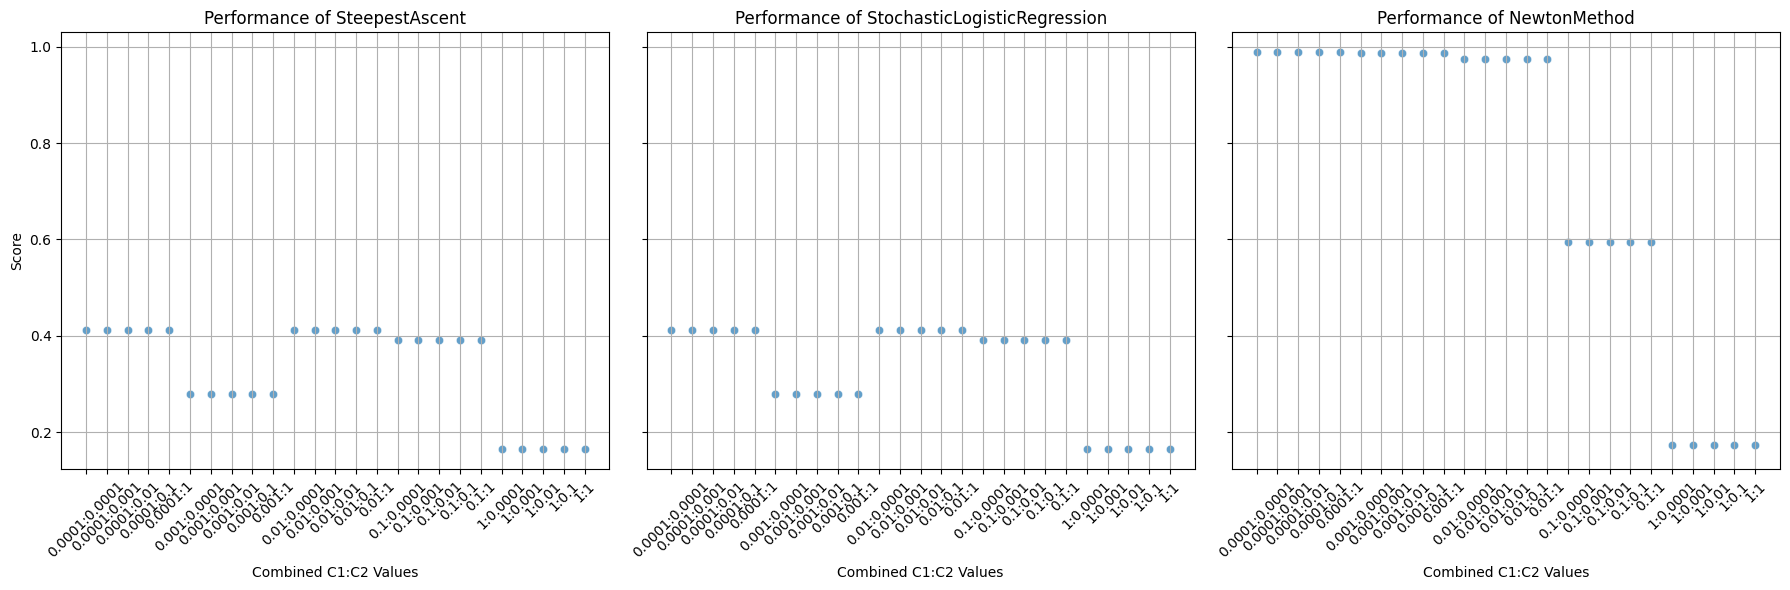

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)  # 3 subplots for 3 methods, sharing the same y-axis

methods = dfplot['Method'].unique()  # Get the unique list of methods

# Iterate through the methods and create a scatter plot for each
for i, method in enumerate(methods):
    method_data = dfplot[dfplot['Method'] == method]
    ax = axes[i]
    sns.scatterplot(ax=ax, data=method_data, x='C_Combined', y='Score', alpha=0.7)

    ax.set_title(f'Performance of {method}')
    ax.set_xlabel('Combined C1:C2 Values')
    if i == 0:
        ax.set_ylabel('Score')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels for better readability
    ax.grid(True)

plt.tight_layout()
plt.show()

From the three scatterplot charts: Performance of SteepestAscent, Performance of StochasticLogisticRegression, and Performance of NewtonMethod, we can see that the Newton Method is the most effective method out of the three optimization methods. The highest accuracy of the Steepest Ascent method sat around 0.55 and the highest accuracy of Stochastic Logistic Regression fell around 0.3, and these pale in comparison to the Newton Method which achieved accuracies extremely close to 1.0.

When comparing these three methods, we adjusted the value of the regulation terms "C" and "C2". For this parameter, we chose the values 0.0001, 0.001, 0.01, 0.1, and 1. We chose these intervals because each value of "C" and "C2" is 10x greater than the last, which provides a good point of comparison when evaluating the different "C" values against each other. We limited the number of C values in order to find a balance between performance and time, as there was not a large enough difference to justify testing between "C" values of 0.0001, 0.0002, 0.0003, and so on.

Despite our experiments with optimization technique and testing different regularization terms providing highly accurate results, our methods were notably less efficient in terms of training time compared to scikit-learn.

# 3.2 Comparing to Scikit-learn

Compare the performance of your "best" logistic regression optimization procedure to the procedure used in scikit-learn. Visualize the performance differences in terms of training time and classification performance.

In [ ]:
from sklearn.linear_model import LogisticRegression as SKLogisticRegression

# Start the timer
start_time = time.time()
lr_sk.fit(X_train, y_train)
fit_time = time.time() - start_time
print(f"Time taken to fit the model: {fit_time:.4f} seconds")
print(np.hstack((lr_sk.intercept_[:, np.newaxis], lr_sk.coef_)))
start_time = time.time()
yhat = lr_sk.predict(X_test)
predict_time = time.time() - start_time
print(f"Time taken to predict: {predict_time:.4f} seconds")
accuracy = accuracy_score(y_test, yhat)
print(f'Accuracy of: {accuracy}')

Time taken to fit the model: 4.4898 seconds
[[-5.39849286e+00  4.96823710e-01 -3.71143547e-02 ...  1.81960031e-02
  -8.75221981e-04 -3.77422415e-02]
 [-5.13009463e+00 -1.52491052e-02 -1.26163604e-02 ... -2.38091037e-02
  -7.96296257e-03 -1.07165431e-01]
 [-5.41975134e+00 -2.96370027e-02  5.44470549e-02 ... -1.02580815e-03
  -7.06352436e-03 -3.90972460e-02]
 ...
 [-5.57900594e+00  1.65516764e-02  3.30875843e-02 ...  1.32739564e-02
  -4.60918999e-03 -2.61676458e-02]
 [-5.69931429e+00 -3.50583924e-02 -1.14614620e-02 ... -1.43161667e-02
  -3.62096861e-03 -3.18912973e-02]
 [-5.05125225e+00 -1.44564134e-02 -6.44650682e-03 ... -2.31767281e-02
  -2.07359592e-03 -1.52836389e-01]]
Time taken to predict: 0.0556 seconds
Accuracy of: 1.0


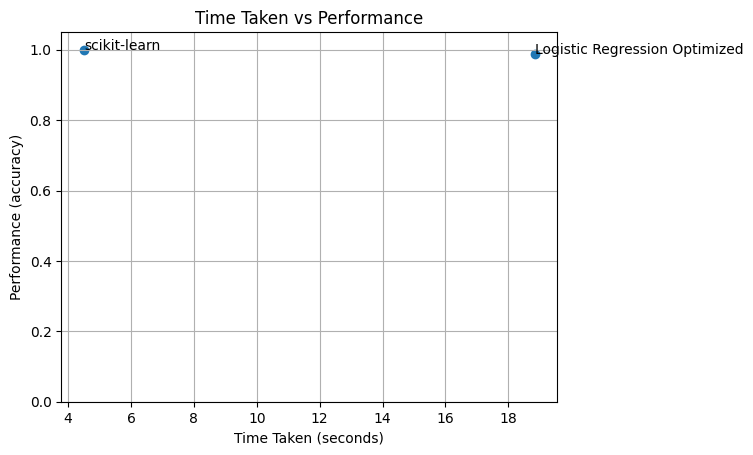

In [ ]:
times = [4.5, 18.841]  # Timing data
performances = [1, 0.988]  # Performance data
labels = ['scikit-learn', 'Logistic Regression Optimized']  # Labels for each point

# Create a scatter plot of time versus performance
plt.scatter(times, performances)

# Label each point with its corresponding label
for label, time, performance in zip(labels, times, performances):
    plt.text(time, performance, label)

# Set the title and labels
plt.title('Time Taken vs Performance')
plt.xlabel('Time Taken (seconds)')
plt.ylabel('Performance (accuracy)')

# Adjust y-axis to start at 0 and end at a value slightly above the highest performance for better visibility
plt.ylim(0, max(performances) + 0.05)

# Show grid
plt.grid(True)

# Show the plot
plt.show()

As you can see, while the performance of both scikit-learn and the logistic regression optimized are very similar, the training time needed for scikit-learn is much faster compared to the logistic regression method. This shows that using scikit-learn is preferable when trying to optimize both performance and time.

# 4.0 Deployment
Which implementation of logistic regression would you advise be used in a deployed machine learning model, your implementation or scikit-learn (or other third party implementation)? Why?

I would use scikit-learn because, when comparing both the performance and the training time needed, scikit-learn is much faster and is just slightly better than my implementation of the logistic regression model. As seen from the Time Taken Vs Performance graph above, although the performance of both are very similar, scikit learn is 4 times faster compared to my own implementation, supporting my argument that using scikit-learn is the more optimal method to be used in a deployed machine learning model.

In [ ]:
# linear boundaries visualization from sklearn documentation
#from matplotlib import pyplot as plt
#import numpy as np
#import copy
#%matplotlib inline
#plt.style.use('ggplot')

#methods = ("SteepestAscent", "StochasticLogisticRegression", "NewtonMethod")
#data = {
#    "0.0001" : (0.5465195743434541, 0.15190862052133164, 0.9891633310553549),
#    "0.001" : (0.38836278434052524, 0.24504539685638974, 0.9878941716294054),
#    "0.01" : (0.25539392756028506, 0.16303817241042665, 0.9750073220736113),
#    "0.1" : (0.3579029581177389, 0.1795372449477692, 0.5959191643073318),
#    "1" : (0.16479547007712583, 0.1504442057990823, 0.17338670311432197)
#}

#x = np.arange(len(methods))  # the label locations
#width = 0.1  # the width of the bars
#multiplier = -1

#fig, ax = plt.subplots(layout='constrained')

#for c_val, accuracy in data.items():
#    offset = width * multiplier
#    rects = ax.bar(x + offset, accuracy, width, label = c_val)
#    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('Accuracy')
#ax.set_title('Accuracy by Regression Method')
#ax.set_xticks(x + width, methods)
#ax.legend(loc='upper left', ncols=3)
#ax.set_ylim(0, 1)

#plt.show()

# 5.0 Exceptional Work

 Update the code to use either "one-versus-all" or "one-versus-one" extensions of binary to multi-class classification.

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
X = final_df.values
y = df['genre'].values

# encoding target variable
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# split dataset
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np

class MultiClassLogisticRegressionOvA:
    def __init__(self, C=1.0, iterations=100):
        self.C = C  # C is the inverse of regularization strength
        self.iterations = iterations
        self.classifiers = []

    def fit(self, X, y):
        self.unique_classes = np.unique(y)
        for class_val in self.unique_classes:
            y_binary = (y == class_val).astype(int)
            clf = LogisticRegression(C=self.C, max_iter=self.iterations)
            clf.fit(X, y_binary)
            self.classifiers.append(clf)

    def predict(self, X):
        # Get probabilities for each class
        predictions = np.array([clf.predict_proba(X)[:, 1] for clf in self.classifiers]).T
        # Return the class with the highest probability
        return np.argmax(predictions, axis=1)

In [ ]:
# init train + predict
lr_ova = MultiClassLogisticRegressionOvA(C=1.0, iterations=100)
lr_ova.fit(X_train_scaled, y_train_encoded)

y_pred_encoded = lr_ova.predict(X_test_scaled)

# decode encoded predictions back to original labels
y_pred = encoder.inverse_transform(y_pred_encoded)

# calculate + print accuracy
accuracy = accuracy_score(encoder.inverse_transform(y_test_encoded), y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


We implemented and applied the One-vs-All (OvA) approach, also known as One-vs-Rest, to extend logistic regression for multi-class classification problems. Logistic regression, by its nature, is designed for binary classification tasks, determining the probability that a given input belongs to a particular class. The challenge arises when we aim to apply logistic regression to scenarios where more than two classes are involved, such as classifying video games into multiple genres based on their features. Previously, logistic regression was applied directly to binary classification problems without needing a strategy like OvA. Direct application meant modeling the probability of instances belonging to a single class (positive class) as opposed to another (negative class). The introduction of OvA was necessary because it allowed logistic regression to be applicable in multi-class settings, which it isn't natively equipped to handle. Instead of modifying logistic regression itself, OvA cleverly decomposes a multi-class problem into multiple binary classification problems, leveraging logistic regression's binary classification capability.

The accuracy shows OvA's versatility and robustness when combined with logistic regression.

# References
1. https://github.com/eclarson/MachineLearningNotebooks/blob/master/05.%20Logistic%20Regression.ipynb
2. https://github.com/eclarson/MachineLearningNotebooks/blob/master/06.%20Optimization.ipynb